<a href="https://colab.research.google.com/github/andreviniciusmb/ia_ic/blob/main/AjusteModelo_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 3
Para cada característica individualmente calcule o R2, mostre o histograma e o gráfico de resíduos, e calcule o teste de normalidade. Compare o resultado com a característica "age".
Adicionalmente, também mostre o histograma e o gráfico de resíduos, para o processo com as duas características (regressão com duas variáveis) do exercício anterior.

## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelagem
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

## p-value
from statsmodels.stats.diagnostic import normal_ad

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregamento do dataset

In [14]:
diabetes = load_diabetes()

tabela = pd.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela['y'] = diabetes.target
tabela.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Modelagem e Ajuste

Coluna: Age
R2 Score: -0.13


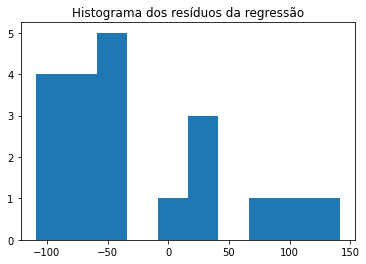

Residuos não são normalmente distribuídos


In [15]:
y = tabela['y']
y_train = y[:-20]
y_test = y[-20:].array.to_numpy().reshape(-1,1)

print('Coluna: Age', )
X = tabela['age']
X_train = X[:-20].array.to_numpy().reshape(-1,1)
X_test = X[-20:].array.to_numpy().reshape(-1,1)

modelo = linear_model.LinearRegression()

modelo.fit(X_train, y_train)
predicao = modelo.predict(X_test)

# Calculando o r2
r2score = r2_score(y_test, predicao)
print('R2 Score: {:.2f}'.format(r2score))

# Histogramas dos resíduos
residuos = y_test - predicao.reshape(-1,1)

plt.hist(residuos)
plt.title('Histograma dos resíduos da regressão')
plt.show()

# Calculando o p-valor e fazendo o teste de normalidade
p_value = normal_ad(residuos)[1]
if p_value < 0.05:A
  print('Residuos não são normalmente distribuídos')
else:
  print('Residuos são normalmente distribuídos')

Olhando o R2 score, histograma dos resíduos e o teste de normalidade para variável.

Coluna:  sex
R2 Score: -0.14


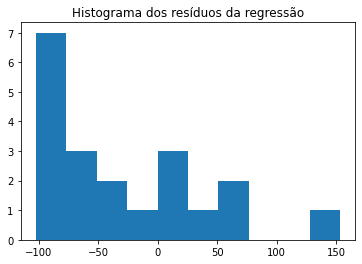

Residuos são normalmente distribuídos

Coluna:  bmi
R2 Score: 0.47


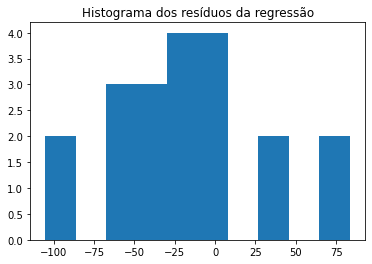

Residuos são normalmente distribuídos

Coluna:  bp
R2 Score: 0.16


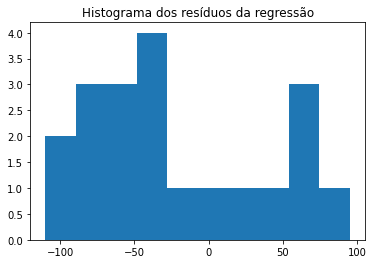

Residuos são normalmente distribuídos

Coluna:  s1
R2 Score: -0.16


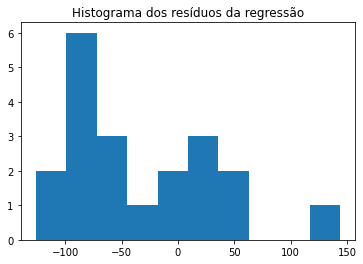

Residuos são normalmente distribuídos

Coluna:  s2
R2 Score: -0.15


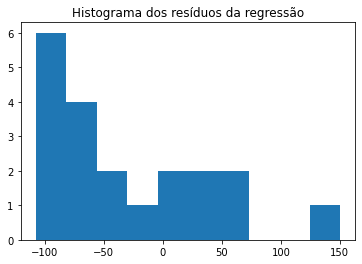

Residuos não são normalmente distribuídos

Coluna:  s3
R2 Score: 0.06


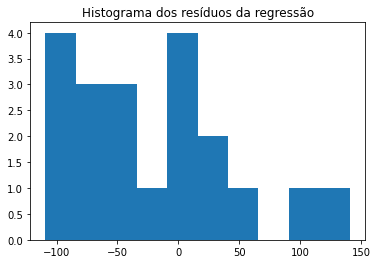

Residuos são normalmente distribuídos

Coluna:  s4
R2 Score: -0.00


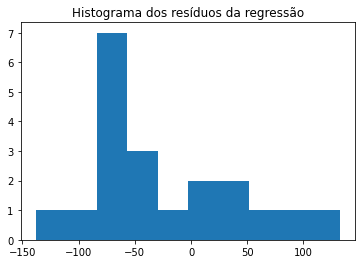

Residuos são normalmente distribuídos

Coluna:  s5
R2 Score: 0.39


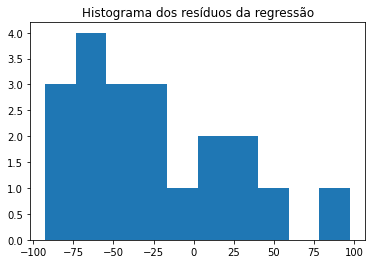

Residuos são normalmente distribuídos

Coluna:  s6
R2 Score: -0.09


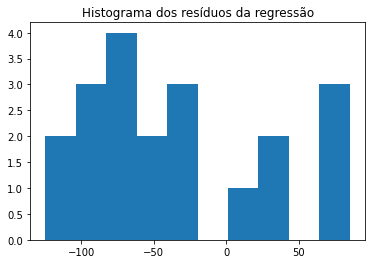

Residuos não são normalmente distribuídos



In [11]:
cols = tabela.drop(['age','y'],axis=1).columns
y = tabela['y']
y_train = y[:-20]
y_test = y[-20:].array.to_numpy().reshape(-1,1)

for coluna in cols:
  print('Coluna: ', coluna)
  X = tabela[coluna]
  X_train = X[:-20].array.to_numpy().reshape(-1,1)
  X_test = X[-20:].array.to_numpy().reshape(-1,1)

  modelo = linear_model.LinearRegression()

  modelo.fit(X_train, y_train)
  predicao = modelo.predict(X_test)

  # Calculando o r2
  r2score = r2_score(y_test, predicao)
  print('R2 Score: {:.2f}'.format(r2score))

  # Histogramas dos resíduos
  residuos = y_test - predicao.reshape(-1,1)

  plt.hist(residuos)
  plt.title('Histograma dos resíduos da regressão')
  plt.show()

  # Calculando o p-valor e fazendo o teste de normalidade
  p_value = normal_ad(residuos)[1]
  if p_value < 0.05:
    print('Residuos não são normalmente distribuídos\n')
  else:
    print('Residuos são normalmente distribuídos\n')

Verificando o R2 score, gráfico de resíduos e teste de normalidade para as variáveis BMI e S4 combinadas de acordo com o exercício anterior.

Colunas: BMI e S4
R2 Score: 0.48


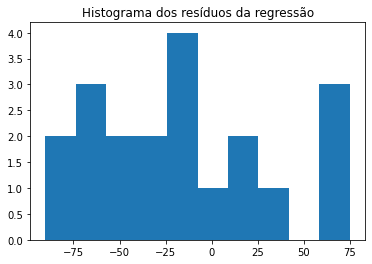

Residuos são normalmente distribuídos


In [13]:
y = tabela['y']
y_train = y[:-20]
y_test = y[-20:].array.to_numpy().reshape(-1,1)

print('Colunas: BMI e S4')
X = tabela[['bmi','s4']]
X_train = X[:-20]
X_test = X[-20:]

modelo = linear_model.LinearRegression()

modelo.fit(X_train, y_train)
predicao = modelo.predict(X_test)

# Calculando o r2
r2score = r2_score(y_test, predicao)
print('R2 Score: {:.2f}'.format(r2score))

# Histogramas dos resíduos
residuos = y_test - predicao.reshape(-1,1)

plt.hist(residuos)
plt.title('Histograma dos resíduos da regressão')
plt.show()

# Calculando o p-valor e fazendo o teste de normalidade
p_value = normal_ad(residuos)[1]
if p_value < 0.05:
  print('Residuos não são normalmente distribuídos')
else:
  print('Residuos são normalmente distribuídos')